# First Name: Li
# Last Name: Chengjie

# Import Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

# Read in CSV File

In [18]:
sales = pd.read_csv('sales.csv')
sales.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,4/07/2015,1477969,3829822,278080
1,11/07/2015,1459132,3425039,292275
2,18/07/2015,1515182,3963434,313403
3,25/07/2015,1454695,3792073,273735
4,1/08/2015,1495088,4632792,302424


# Data Management

In [19]:
from datetime import datetime
sales['Week Ending Date'] = pd.to_datetime(sales['Week Ending Date'])
sales.head()

,Week Ending Date,Lotto,Instant,Pulltab
0,2015-04-07,1477969,3829822,278080
1,2015-11-07,1459132,3425039,292275
2,2015-07-18,1515182,3963434,313403
3,2015-07-25,1454695,3792073,273735
4,2015-01-08,1495088,4632792,302424


In [20]:
sales.set_index('Week Ending Date', inplace=True)
sales.sort_values('Week Ending Date', inplace=True)

sales.head()

,Lotto,Instant,Pulltab
Week Ending Date,,,
2015-01-08,1495088,4632792,302424
2015-03-10,2238026,3577988,311348
2015-04-07,1477969,3829822,278080
2015-05-09,1683879,3586720,278674
2015-05-12,1630160,3968194,357047


In [21]:
sales['Lotto'] = pd.to_numeric(sales['Lotto'])
print(sales.describe())

              Lotto       Instant        Pulltab
count  1.830000e+02  1.830000e+02     183.000000
mean   2.112038e+06  4.559790e+06  233934.338798
std    1.607643e+06  7.422811e+05   66801.865481
min    1.341382e+06  3.128323e+06  110805.000000
25%    1.546407e+06  3.978167e+06  187110.000000
50%    1.677419e+06  4.459901e+06  229280.000000
75%    2.014369e+06  4.950061e+06  276428.000000
max    1.366234e+07  6.851486e+06  630855.000000


In [22]:
sales.index

DatetimeIndex(['2015-01-08', '2015-03-10', '2015-04-07', '2015-05-09',
               '2015-05-12', '2015-07-11', '2015-07-18', '2015-07-25',
               '2015-08-08', '2015-08-15',
               ...
               '2018-10-13', '2018-10-20', '2018-10-27', '2018-11-08',
               '2018-11-17', '2018-11-24', '2018-12-05', '2018-12-15',
               '2018-12-22', '2018-12-29'],
              dtype='datetime64[ns]', name='Week Ending Date', length=183, freq=None)

# Visualise Time Series

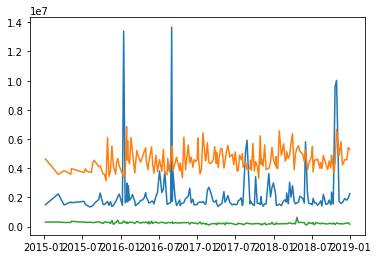

In [23]:
%matplotlib inline

plt.plot(sales)

# Box plot

In [24]:
sales['Week Ending Date	'] = sales.index.month
sales.head()

,Lotto,Instant,Pulltab,Week Ending Date\t
Week Ending Date,,,,
2015-01-08,1495088,4632792,302424,1
2015-03-10,2238026,3577988,311348,3
2015-04-07,1477969,3829822,278080,4
2015-05-09,1683879,3586720,278674,5
2015-05-12,1630160,3968194,357047,5


C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


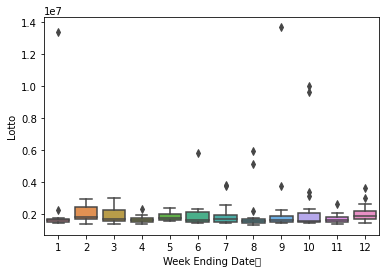

In [25]:
import seaborn as sns
ax = sns.boxplot(data = sales, x='Week Ending Date\t',y='Lotto')

C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


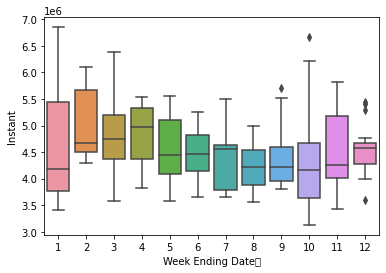

In [26]:
import seaborn as sns
ax = sns.boxplot(data = sales, x='Week Ending Date\t',y='Instant')

C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\flab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


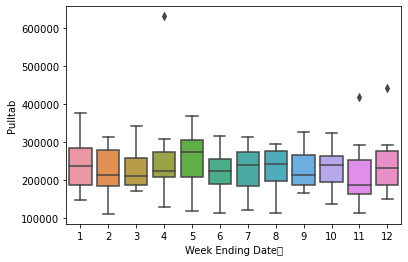

In [27]:
import seaborn as sns
ax = sns.boxplot(data = sales, x='Week Ending Date\t',y='Pulltab')

# 2. Stationarity  - Check

In [28]:
 def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
 
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)  

In [29]:
from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
def test_Dickey_Fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

# Make Time Series Stationary

# Decomposing

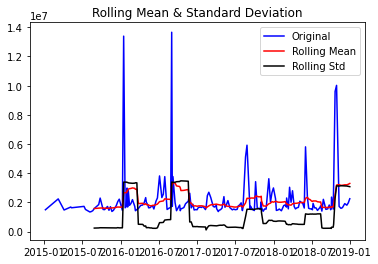

In [30]:
test_stationarity(sales['Lotto'])

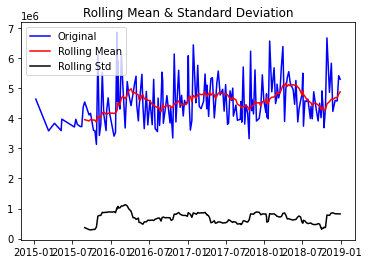

In [31]:
test_stationarity(sales['Instant'])

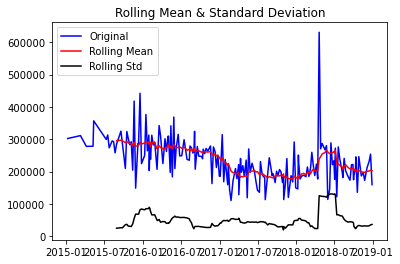

In [32]:
test_stationarity(sales['Pulltab'])

# Plot ACF & PACF chart & find optimal parameter

In [40]:
from statsmodels.tsa.stattools import acf, pacf
ts_log = np.log(sales['Lotto'])

In [41]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

C:\Users\flab\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


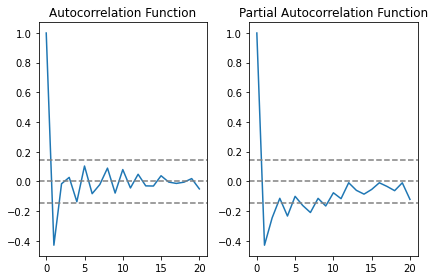

In [42]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

# Build ARIMA model

In [43]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\flab\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\flab\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency i

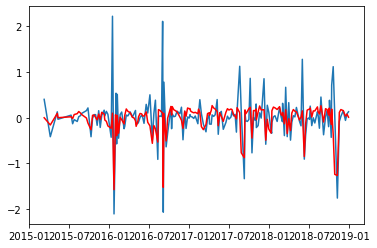

In [44]:
#ARIMA
model = ARIMA(ts_log, order=(1, 1, 1))  #(p,d,q)
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

# Make predictions

In [45]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)

In [46]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [47]:
predictions_ARIMA_log = pd.Series(ts_log[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)

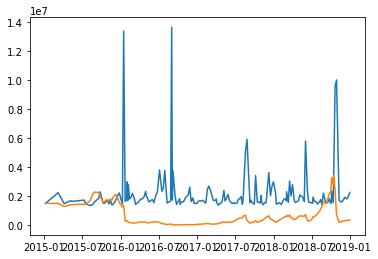

In [48]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(sales['Lotto'])
plt.plot(predictions_ARIMA)  

# conclusion

The sales data for Lotto is the most unstable, the sales data for Instant is most stable 